In [1]:
import numpy as np
import astropy.units as u
from pyirf import simulations,utils 
import matplotlib.pyplot as plt

# Theory

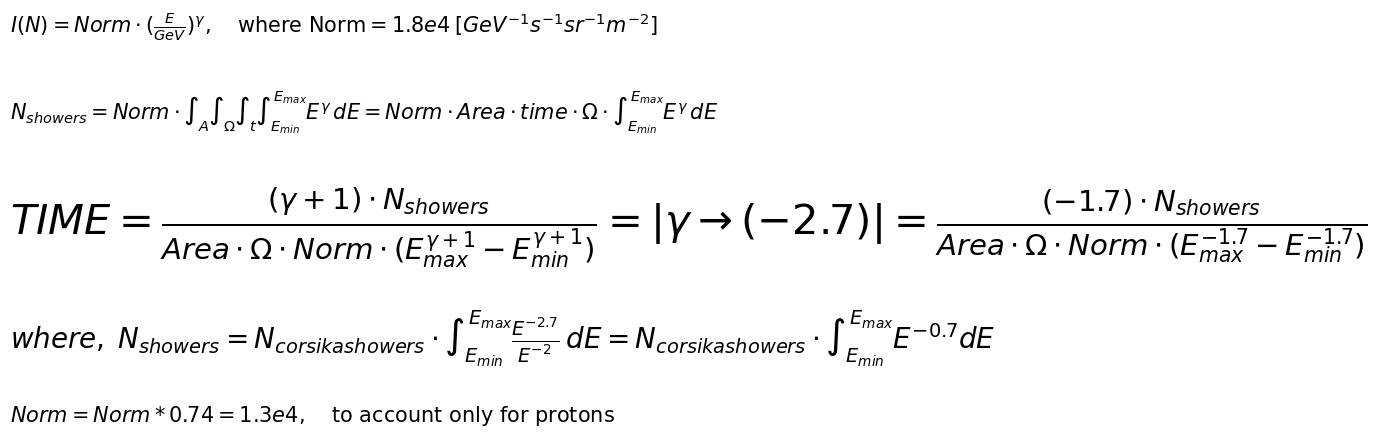

In [3]:
proton_norm_text = r'Norm = Norm * 0.74 = 1.3e4, \: \: \: \: \: \text{to account only for protons}'
intensity_text = r'I(N) = Norm \cdot (\frac{E}{GeV})^{\gamma}, \: \: \: \: \: \text{where Norm} = 1.8e4 \: [GeV^{-1} s^{-1} sr^{-1} m^{-2} ]'
shower_number_text = r'N_{showers} = Norm \cdot \int_A \int_{\Omega} \int_{t} \int_{E_{min}}^{E_{max}} E^{\gamma} \,dE = Norm \cdot Area \cdot time \cdot \Omega \cdot \int_{E_{min}}^{E_{max}} E^{\gamma} \,dE'
time_text = r'TIME = \frac{(\gamma + 1)\cdot N_{showers}}{Area \cdot \Omega \cdot Norm \cdot (E_{max}^{\gamma + 1} - E_{min}^{\gamma + 1})} = | \gamma \rightarrow (-2.7) | = \frac{(-1.7)\cdot N_{showers}}{Area \cdot \Omega \cdot Norm \cdot (E_{max}^{-1.7} - E_{min}^{-1.7})}'
n_showers_text = r'where, \; N_{showers} = N_{corsikashowers} \cdot \int_{E_{min}}^{E_{max}} \frac{{E^{-2.7}}}{{E^{-2}}} \, dE = N_{corsikashowers} \cdot \int_{E_{min}}^{E_{max}} {E^{-0.7} dE} '
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

_ = plt.text(0,2.2,'$%s$' %intensity_text,size=15,color="black")

_ = plt.text(0,1.6,'$%s$' %shower_number_text,size=15,color="black")

_ = plt.text(0,0.8,'$%s$' %time_text,size=30,color="black")

_ = plt.text(0,0,'$%s$' %n_showers_text,size=20,color="black")

_ = plt.text(0,-0.5,'$%s$' %proton_norm_text,size=15,color="black")





# Function

In [4]:
def observational_time(simulated_event_info, norm=18000):
    """
    Calculate observation time for simulated events
    
    This function is adapted from pyirf.spectral.from_simulation method

    Parameters
    ----------
    Parameters are taken from pyirf.simulations.SimulatedEventsInfo object

    e_min - min energy [GeV]
    e_max - max energy [GeV]
    index - index of simulated power law
    n_showers - number of simulated shower (reused accounted)
    viewcone - viewcone of simulation
    max_impact - diameter of the area for simulation
    e_ref - reference energy value
    norm - normalisation factor from all particles spectrum from PDG (multiplied by 0.74 to normalise only for protons )
    ----------

    Returns
    ----------
    time of observation in seconds

    """
    print("=== start of work ====")
    e_min = simulated_event_info.energy_min.to("GeV")
    e_max = simulated_event_info.energy_max.to("GeV")
    index = simulated_event_info.spectral_index
    n_showers = simulated_event_info.n_showers
    viewcone = simulated_event_info.viewcone
    max_impact = simulated_event_info.max_impact.to("m")
    print(f"max impact parameter = {max_impact}")
    e_ref = 1 * u.GeV
    #norm = 0.74 * norm
    print(f"norm = {norm}")
    
    solid_angle = utils.cone_solid_angle(viewcone)
    print(f"solid_angle = {solid_angle}")
    print(f"viewcone = {viewcone}")
    A = (np.pi * (max_impact**2))
    
    delta = e_max ** (index + 1) - e_min ** (index + 1)
    nom = (index + 1) * e_ref**index * n_showers
    denom = A * solid_angle.to_value() * delta * norm
    print("==== end of work =====")
    return (nom / denom).to_value()

# Tests

In [5]:
# MONO Simulation
path = '/fefs/aswg/data/mc/DL0/LSTProd2/TestDataset/Protons/Corsika/node_corsika_theta_10.0_az_248.117_/output'

# integral E^-0.7 from 10 to 103901 GeV
scale_integral = 98.75

runs = 500
showers = 2e4
CSCAT = 10
mono_shower_number = showers * CSCAT * runs * scale_integral

real_proton_number = 42091
weighted_proton_number = 125000
#weighted_proton_number = 1256194
weighted_muon_number = 201

simulated_events2 = simulations.SimulatedEventsInfo(n_showers = int(mono_shower_number), 
                                                    energy_min=10*u.GeV, 
                                                    energy_max=103.9*u.TeV, 
                                                    max_impact = 1.51153*u.km, 
                                                    spectral_index=-2.7, 
                                                    viewcone=9*u.deg)

time_mono = observational_time(simulated_events2)
print(f"time of observation for 500 runs of mono events = {time_mono} seconds")
print(f"Rate of protons = {weighted_proton_number/time_mono} Hz")
print(f"Rate of muons = {weighted_muon_number/time_mono} Hz")

=== start of work ====
max impact parameter = 1511.53 m
norm = 18000
solid_angle = 0.07735643747962972 sr
viewcone = 9.0 deg
==== end of work =====
time of observation for 500 runs of mono events = 84.18480476993561 seconds
Rate of protons = 1484.8285310111032 Hz
Rate of muons = 2.387604277865854 Hz


In [6]:
29217084 - 29216593

491

In [7]:
# 4LST stereo
path = '/fefs/aswg/workspace/MC_common/corsika7.7_simtelarray_20200629/prod5/4LSTs_MAGIC/proton/zenith_20deg/south_pointing/corsika'

# \int E^-0.7 from 10 to 10e5 GeV
scale_integral = 99.9

n_runs = 499
showers = 1e5
CSCAT = 10
stereo_shower_number = showers * CSCAT * runs * scale_integral

original_proton_number = 151415
original_muon_number = 170
weighted_proton_number = 328637
weighted_muon_number = 368
cleaned_muon_number = 1870


simulated_events3 = simulations.SimulatedEventsInfo(n_showers = int(stereo_shower_number), 
                                                    energy_min=10*u.GeV, 
                                                    energy_max=100*u.TeV, 
                                                    max_impact = 1.500*u.km, 
                                                    spectral_index=-2.7, 
                                                    viewcone=10*u.deg)

time_stereo = observational_time(simulated_events3)
print(f"time of observation for 500 runs of stereo events =  {time_stereo} seconds")
print(f"Rate of protons = {weighted_proton_number/time_stereo} Hz")
print(f"Rate of muons = {weighted_muon_number/time_stereo} Hz")
print(f"Rate of muons = {cleaned_muon_number/time_stereo} Hz")

=== start of work ====
max impact parameter = 1500.0 m
norm = 18000
solid_angle = 0.0954557030567379 sr
viewcone = 10.0 deg
==== end of work =====
time of observation for 500 runs of stereo events =  350.4109800097184 seconds
Rate of protons = 937.8615932379901 Hz
Rate of muons = 1.0501954019528548 Hz
Rate of muons = 5.336590765358257 Hz


In [209]:
# MONO low zenith Simulation for high energies
path = '/fefs/aswg/data/mc/DL0/LSTProd2/TrainingDataset/Protons/dec_2276/sim_telarray/node_theta_66.446_az_75.983_/output_v1.4/'

# integral E^-0.7 from 10 to 103901 GeV
scale_integral = 116.5

runs = 499
showers = 3e4
CSCAT = 10
mono_shower_number = showers * CSCAT * runs * scale_integral

real_proton_number = 42091
weighted_proton_number = 426238.4427456507
weighted_muon_number = 909

simulated_events2 = simulations.SimulatedEventsInfo(n_showers = int(mono_shower_number), 
                                                    energy_min=99*u.GeV, 
                                                    energy_max=200*u.TeV, 
                                                    max_impact = 2.372*u.km, 
                                                    spectral_index=-2.7, 
                                                    viewcone=5.057*u.deg)

time_mono = observational_time(simulated_events2)
print(f"time of observation for 500 runs of mono events = {time_mono} seconds")
print(f"Rate of protons = {weighted_proton_number/time_mono} Hz")
print(f"Rate of muons = {weighted_muon_number/time_mono} Hz")

=== start of work ====
max impact parameter = 2372.0 m
norm = 18000
solid_angle = 0.024457303069526867 sr
viewcone = 5.057 deg
==== end of work =====
time of observation for 500 runs of mono events = 9408.431109037128 seconds
Rate of protons = 45.3038809346474 Hz
Rate of muons = 0.096615470684254 Hz


In [207]:
i = quad(lambda x: math.pow(x, -0.7), 100, 2e5)
print(i)

(116.50377680694127, 2.7781355401615795e-09)


### Spectral weighting

In [164]:
simulated_events = simulations.SimulatedEventsInfo(n_showers = int(42091), 
                                                   energy_min=10*u.GeV, 
                                                   energy_max=103.9*u.TeV, 
                                                   max_impact = 1.511*u.km, 
                                                   spectral_index=-2, 
                                                   viewcone=9*u.deg)

In [2]:
with open('/Users/vdk/energy.txt', 'r') as fi:
    one_line = fi.read()
    many_lines = one_line.split(",")
    energy_array_protons = [float(value) for value in many_lines[:-1]]

with open('/Users/vdk/energy_muons.txt', 'r') as fi:
    one_line = fi.read()
    many_lines = one_line.split(",")
    energy_array_muons = [float(value) for value in many_lines[:-1]]

w_protons = sum([energy**(-0.7) for energy in energy_array_protons])
w_muons = sum([energy**(-0.7) for energy in energy_array_muons])
print(f"protons weighted manually = {w_protons}")
print(f"muons weighted manually = {w_muons}")




simulated_spectrum = spectral.PowerLaw(normalization = 1 * spectral.DIFFUSE_FLUX_UNIT, index = -2, e_ref =1* u.TeV)
target_spectrum = spectral.PowerLaw(normalization = 1 * spectral.DIFFUSE_FLUX_UNIT, index = -2.7, e_ref =1* u.TeV)

#target_spectrum = spectral.PDG_ALL_PARTICLE
#simulated_spectrum = spectral.PowerLaw.from_simulation(simulated_events, obstime=0.1*u.s)

pyirf_weighted = [spectral.calculate_event_weights(energy*u.TeV, target_spectrum=target_spectrum, simulated_spectrum=simulated_spectrum) for energy in energy_array_protons]
print(f"protons weighted pyirf = {sum(pyirf_weighted)}")
#print(f"muons weighted manually = {w_muons}")

protons weighted manually = 2134492.4896463333
muons weighted manually = 206.1955031290796


NameError: name 'spectral' is not defined

In [113]:
from scipy.integrate import quad

In [115]:
import math
i = quad(lambda x: math.pow(x, -2.7), 10, 1e5)
print(i)

(0.011736835286712426, 1.1399107120687424e-11)


In [116]:
math.pi * 1500**2

7068583.470577034

In [117]:
(math.pi * 1500**2) * 1.8e4 * 0.077 * 0.01173

114919474.97627789

In [140]:
# MONO Simulation
path = '/fefs/aswg/data/mc/DL0/LSTProd2/TestDataset/Protons/Corsika/node_corsika_theta_10.0_az_248.117_/output'

# integral E^-0.7 from 10 to 103901 GeV
scale_integral = 98.75 / 98.75

runs = 499
showers = 2e4
CSCAT = 10
mono_shower_number = showers * CSCAT * runs * scale_integral

obs_protons = 53000

weighted_proton_number = 114868
weighted_muon_number = 206

simulated_events2 = simulations.SimulatedEventsInfo(n_showers = int(obs_protons), 
                                                    energy_min=200*u.GeV, 
                                                    energy_max=300*u.TeV, 
                                                    max_impact = 1.5*u.km, 
                                                    spectral_index=-2.7, 
                                                    viewcone=4.5*u.deg)

time_mono = observational_time(simulated_events2)
print(f"time of observation for 500 runs of mono events = {time_mono} seconds")
print(f"Rate of protons = {weighted_proton_number/time_mono} Hz")
print(f"Rate of muons = {weighted_muon_number/time_mono} Hz")

=== start of work ====
max impact parameter = 1500.0 m
norm = 18000
solid_angle = 0.01936896339494852 sr
viewcone = 4.5 deg
==== end of work =====
time of observation for 500 runs of mono events = 0.29837761680208663 seconds
Rate of protons = 384975.2579671274 Hz
Rate of muons = 690.4003128915647 Hz


# Muons

In [9]:
def muon_rate(max_impact, viewcone):
    #area = np.pi*(max_impact**2)
    area = 378*4
    solid_angle = utils.cone_solid_angle(np.deg2rad(viewcone)).to_value()
    return 200 * area * solid_angle

In [12]:
rate = muon_rate(378*4, 4.5*4)
print(rate)

92994.34365541399


In [251]:
1e7 / '{:e}'.format(20000*100)

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [14]:
203852.31627598594 / 5857.174530632433

34.80386579055462

In [253]:
437*5

2185

In [2]:
viewcone = 3.5
radi = 150
area = 150**2 * 3.14

solid_angle = utils.cone_solid_angle(viewcone)

In [4]:
area*solid_angle * 3/20000

<Quantity 128.94101399 sr>

In [5]:
128*200

25600